# Functions

In [1]:
z_polynomial = ZZ['a']
a = z_polynomial.gen()

In [2]:
def alpha_hook(alpha, partition, i, j):
    return alpha * (partition.leg_length(i, j) + 1) + partition.arm_length(i, j)

In [3]:
def attacking_graph(partition):
    return Graph(partition.attacking_pairs())

In [4]:
def augmented_attacking_graph(partition):
    attacking_pairs = partition.attacking_pairs()
    for i in range(partition.length() - 1):
        for j in range(partition[i + 1]):
            attacking_pairs.append(((i, j), (i + 1, j)))
    return Graph(attacking_pairs)

In [5]:
def get_subgraphs(graph):
    vertices = graph.vertices(sort=False)
    edges = graph.edges(sort=False)
    for subedges in Subsets(edges):
        yield Graph([vertices, list(subedges)])
    return

In [6]:
p_basis = SymmetricFunctions(QQ).powersum()

In [7]:
def JackPolynomial(partition, alpha):
    polynom = 0
    conj_partition = partition.conjugate()
    ag = attacking_graph(conj_partition)
    aag = augmented_attacking_graph(conj_partition)
    for subgraph in get_subgraphs(aag):
        subgraph_edges = subgraph.edges(sort=False)
        prod = 1
        for edge in set(subgraph_edges).difference(ag.edges(sort=False)):
            prod *= - alpha_hook(alpha, conj_partition, *max(edge[:2]))
        polynom += (-1)**len(subgraph_edges) * p_basis[subgraph.connected_components_sizes()] * prod
    return polynom

# Examples

In [8]:
p = Partition([4,3,2])
alpha_hook(a, p, 0, 1)

3*a + 2

In [9]:
p.conjugate()

[3, 3, 2, 1]

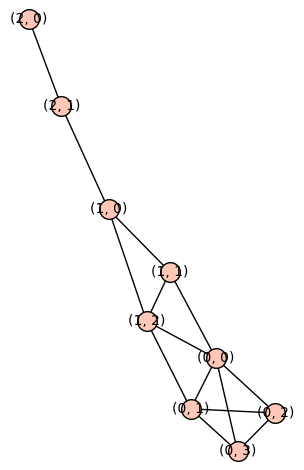

In [10]:
Graph(attacking_graph(p)).plot()

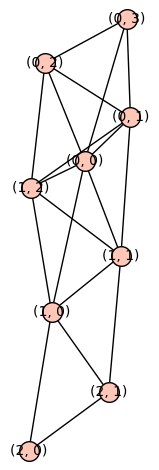

In [11]:
Graph(augmented_attacking_graph(p)).plot()

In [12]:
for subgraph in get_subgraphs(augmented_attacking_graph(p)):
    print(subgraph)
    break

Graph on 9 vertices


In [16]:
for partition in Partitions(4):
    print(partition, JackPolynomial(partition, a))

[4] 6*p[4]*a^3 + (3*p[2, 2] + 8*p[3, 1])*a^2 + 6*p[2, 1, 1]*a + p[1, 1, 1, 1]
[3, 1] (2*p[3, 1] - 2*p[4])*a^2 + (3*p[2, 1, 1] - p[2, 2] - 2*p[3, 1])*a + p[1, 1, 1, 1] - p[2, 1, 1]
[2, 2] (p[2, 2] - p[4])*a^2 + (2*p[2, 1, 1] + p[2, 2] - 4*p[3, 1] + p[4])*a + p[1, 1, 1, 1] - 2*p[2, 1, 1] + p[2, 2]
[2, 1, 1] (p[2, 1, 1] - p[2, 2] - 2*p[3, 1] + 2*p[4])*a + p[1, 1, 1, 1] - 3*p[2, 1, 1] + 2*p[3, 1]
[1, 1, 1, 1] p[1, 1, 1, 1] - 6*p[2, 1, 1] + 3*p[2, 2] + 8*p[3, 1] - 6*p[4]


# Tests

In [14]:
import time
cumulative_time = 0

def test(n, func):
    global cumulative_time
    start = time.time()
    res = func(n)
    end = time.time()
    cumulative_time += end - start
    print(n, end - start, cumulative_time, sep="\t")
    return res

In [15]:
def jack_test(k):
    for partition in Partitions(k):
        _ = JackPolynomial(partition, a)

for n in range(8):
    test(n, jack_test)

0	0.0002598762512207031	0.0002598762512207031
1	0.00013327598571777344	0.00039315223693847656
2	0.00038504600524902344	0.0007781982421875
3	0.0012917518615722656	0.0020699501037597656
4	0.007588863372802734	0.0096588134765625
5	0.07000494003295898	0.07966375350952148
6	2.0972847938537598	2.1769485473632812


KeyboardInterrupt: 